In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("../data/new/studywide_stats_for_alex_27March2023/studywide_stats_for_volume.txt", delimiter="\t")
df = df[1:]

df.head()

,ROI,structure,N57437,N57442,N57446,N57447,N57449,N57451,N57496,N57498,...,N60131,N60139,N60163,N60159,N60157,N60127,N60161,N60169,N60137,N60129
1,1,"Cingulate_Cortex,_Area_24a",1.003104,1.113639,1.064340,1.007022,1.048029,1.085846,1.153460,1.074182,...,0.885462,0.946698,0.993900,0.903595,0.973215,0.931298,0.988251,1.061424,0.960640,0.889653
2,2,"Cingulate_Cortex,_Area_24a_prime",0.405233,0.394480,0.422547,0.417990,0.456627,0.463553,0.454805,0.434575,...,0.355114,0.398854,0.412796,0.390562,0.377258,0.367689,0.365776,0.426374,0.374797,0.350011
3,3,"Cingulate_Cortex,_Area_24b",0.809008,0.858124,0.870882,0.924919,0.847371,0.931753,0.777023,0.862134,...,0.742031,0.732554,0.737383,0.728727,0.836436,0.715605,0.625755,0.895850,0.759891,0.765359
4,4,"Cingulate_Cortex,_Area_24b_prime",0.283490,0.294972,0.315201,0.320031,0.309005,0.315201,0.308549,0.330966,...,0.240297,0.278660,0.278934,0.236287,0.275471,0.264171,0.235285,0.304175,0.256881,0.258066
5,5,"Cingulate_Cortex,_Area_29a",0.243304,0.272008,0.216878,0.275927,0.247313,0.285130,0.222618,0.264354,...,0.254057,0.266632,0.245946,0.245764,0.289778,0.253601,0.263898,0.283854,0.242301,0.279936


In [3]:
node_labels = pd.read_excel("../data/raw/CHASSSYMM3AtlasLegends.xlsx")[:-1]
node_labels.index2 = node_labels.index2.astype(int)

for idx, row in df.iterrows():
    df.loc[idx, "structure"] = node_labels.loc[node_labels.index2 == int(row["ROI"]), "Structure"].values[0]

df.head()

,ROI,structure,N57437,N57442,N57446,N57447,N57449,N57451,N57496,N57498,...,N60131,N60139,N60163,N60159,N60157,N60127,N60161,N60169,N60137,N60129
1,1,Cingulate_Cortex_Area_24a,1.003104,1.113639,1.064340,1.007022,1.048029,1.085846,1.153460,1.074182,...,0.885462,0.946698,0.993900,0.903595,0.973215,0.931298,0.988251,1.061424,0.960640,0.889653
2,2,Cingulate_Cortex_Area_24a_prime,0.405233,0.394480,0.422547,0.417990,0.456627,0.463553,0.454805,0.434575,...,0.355114,0.398854,0.412796,0.390562,0.377258,0.367689,0.365776,0.426374,0.374797,0.350011
3,3,Cingulate_Cortex_Area_24b,0.809008,0.858124,0.870882,0.924919,0.847371,0.931753,0.777023,0.862134,...,0.742031,0.732554,0.737383,0.728727,0.836436,0.715605,0.625755,0.895850,0.759891,0.765359
4,4,Cingulate_Cortex_Area_24b_prime,0.283490,0.294972,0.315201,0.320031,0.309005,0.315201,0.308549,0.330966,...,0.240297,0.278660,0.278934,0.236287,0.275471,0.264171,0.235285,0.304175,0.256881,0.258066
5,5,Cingulate_Cortex_Area_29a,0.243304,0.272008,0.216878,0.275927,0.247313,0.285130,0.222618,0.264354,...,0.254057,0.266632,0.245946,0.245764,0.289778,0.253601,0.263898,0.283854,0.242301,0.279936


In [70]:
# Load and basic data cleaning
mouse_df = pd.read_excel("../data/new/qial_animals021423.xlsx")
mouse_df.DWI = mouse_df.DWI.str.slice(0, 6)
mouse_df.Sex_other = mouse_df["Sex_other"].apply(lambda x: x.strip() if isinstance(x, str) else x)
mouse_df.Sex_other = mouse_df.Sex_other.str.capitalize()

missing = np.setdiff1d(list(df.columns[2:]), list(mouse_df.DWI))

mouse_df = mouse_df[~mouse_df.DWI.isna()]
mouse_df = mouse_df[mouse_df.Geno != "CVN"]
mouse_df = mouse_df[mouse_df.Geno != "HN"]

valid_subjects = df.columns[df.columns.isin(mouse_df.DWI)]
mouse_df = mouse_df[mouse_df.DWI.isin(valid_subjects)]

df = df.loc[:, ["ROI", "structure"] + mouse_df.DWI.to_list()]

df.shape

(332, 171)

In [74]:
meta = mouse_df.loc[:, ["DWI", "Geno", "Sex_other", "Weight", "Diet", "Age_Imaging"]]
meta.columns  = ["ID", "Genotype", "Sex", "Weight", "Diet", "Age"]

for idx, row in meta.iterrows():
    if "HN" in row["Genotype"]:
        meta.loc[idx, "Genotype"] = row["Genotype"][:-2]
        meta.loc[idx, "Allele"] = "HN"
    else:
        meta.loc[idx, "Allele"] = "Non-HN"
meta.head()

,ID,Genotype,Sex,Weight,Diet,Age,Allele
0,N57437,APOE44,Male,30.7,Control,16.2,Non-HN
1,N57442,APOE44,Female,25.6,Control,16.2,Non-HN
2,N57446,APOE44,Male,32.1,Control,16.2,Non-HN
3,N57447,APOE44,Female,28.7,Control,16.2,Non-HN
4,N57449,APOE44,Male,31.6,Control,16.2,Non-HN


In [77]:
df.to_csv("../data/new/processed/volumes.csv", index=False)
meta.to_csv("../data/new/processed/meta.csv", index=False)

In [43]:
pd.unique(meta.Genotype)

array(['APOE44', 'APOE22', 'APOE33', 'APOE33HN', 'APOE44HN', 'APOE22HN'],
      dtype=object)

In [79]:
meta[["Genotype", "Sex", "Diet", "Allele", "ID"]].groupby(["Genotype", "Sex","Allele", "Diet"]).count()

ID
Genotype Sex    Allele Diet       
APOE22   Female HN     Control   5
                       HFD       8
                Non-HN Control  17
         Male   HN     Control   5
                       HFD       7
                Non-HN Control  16
APOE33   Female HN     Control   4
                       HFD       6
                Non-HN Control  10
                       HFD       7
         Male   HN     Control   4
                       HFD       6
                Non-HN Control  11
                       HFD       6
APOE44   Female HN     Control   9
                       HFD       8
                Non-HN Control  11
         Male   HN     Control   6
                       HFD       7
                Non-HN Control  16

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

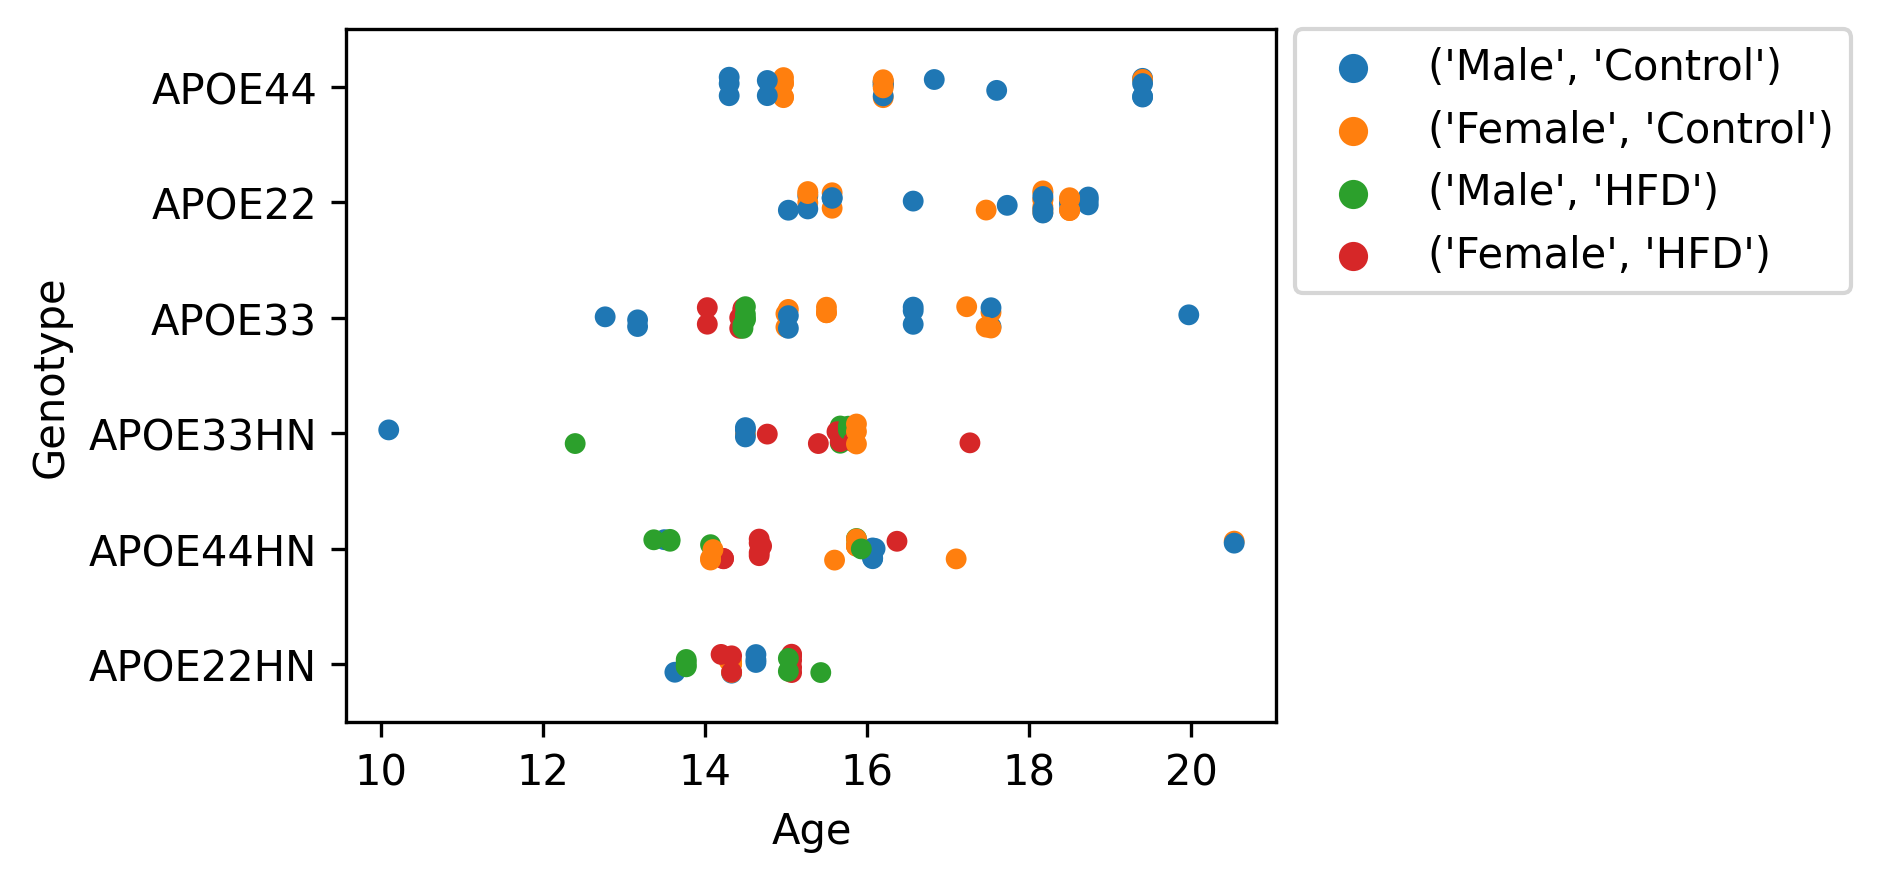

In [52]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=300)

sns.stripplot(data=meta, x = "Age", y = "Genotype", hue=meta[["Sex", "Diet"]].apply(tuple, axis=1), legend=True, ax = ax)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


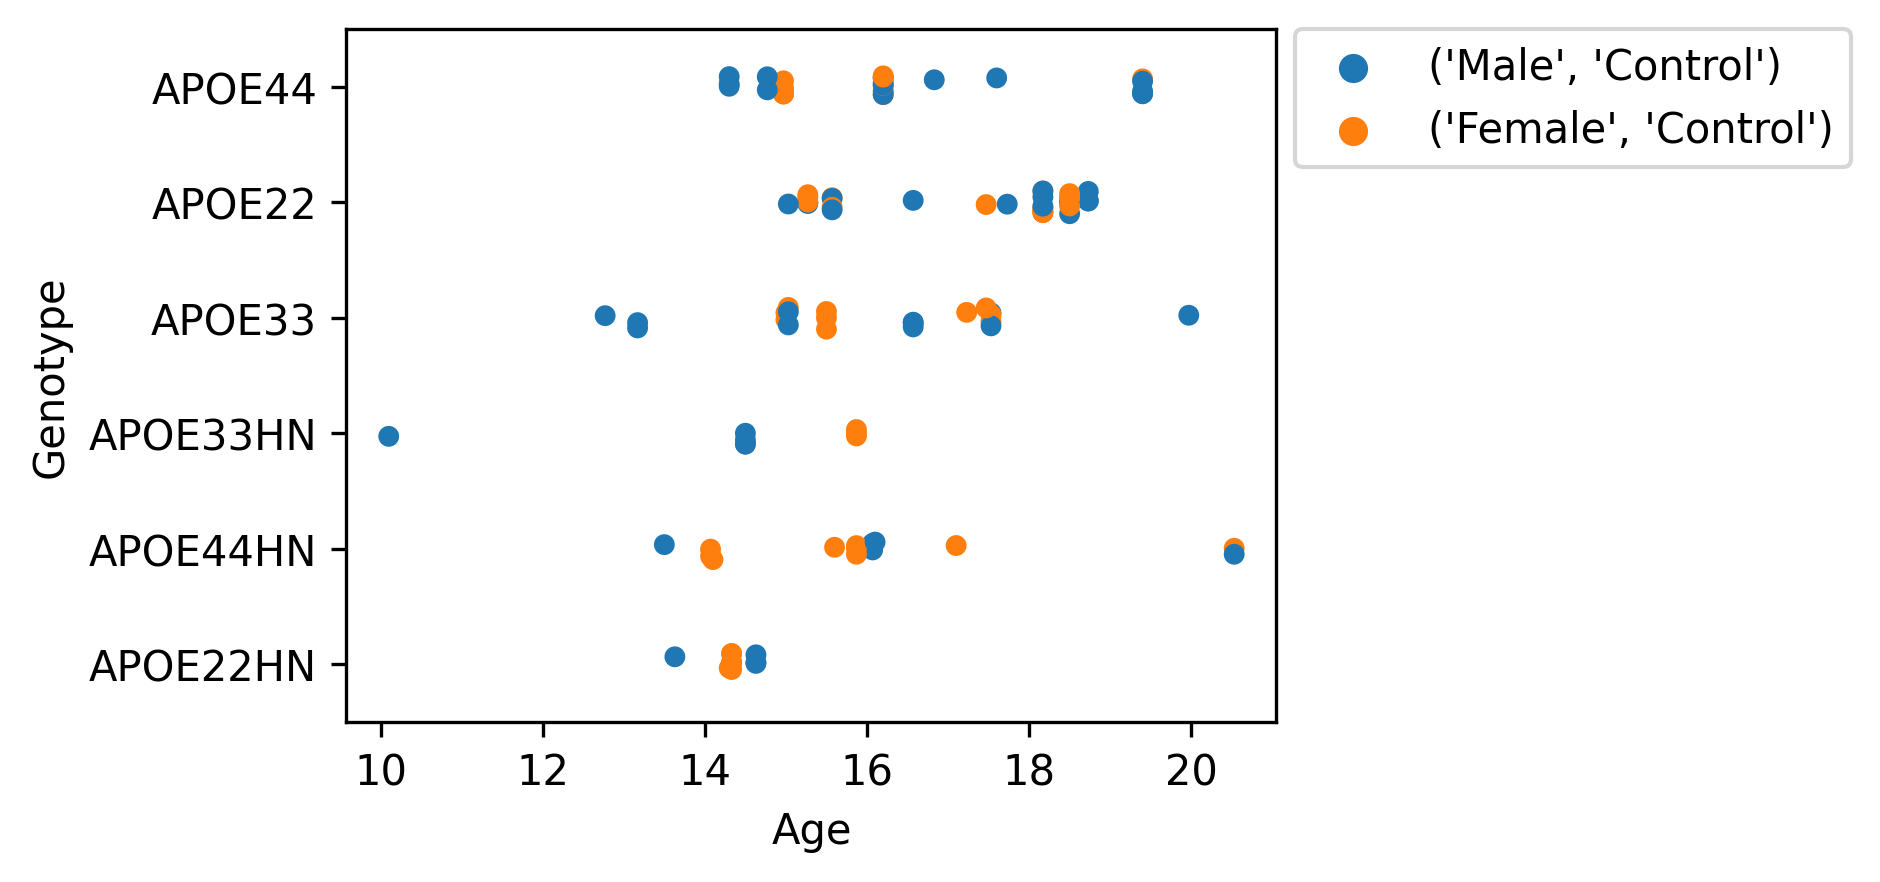

In [53]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=300)
tmp = meta[meta.Diet == "Control"]
sns.stripplot(data=tmp, x = "Age", y = "Genotype", hue=tmp[["Sex", "Diet"]].apply(tuple, axis=1), legend=True, ax = ax)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)